<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/7_2_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1
주어진 데이터셋(`concrete.csv`)을 사용하여 콘크리트 강도를 예측하는 인공신경망을 작성하고 학습하시오.
-	독립변수: `Cement`, `BlastFurnaceSlag`, `FlyAsh`, `Water`, `Superplasticizer`, `CoarseAggregate`, `FineAggregate`, `Age`
-	타겟변수: `CompressiveStrength`
-	2개의 은닉층을 갖는 신경망을 생성: 첫번째 은닉층의 노드의 수 16개, 두번째 은닉층의 노드의 수 32개
-	학습 과정에서 학습용 데이터의 20%는 검증용으로 설정
-	`epochs`=50, `batch_size`=64
-	모델 학습 결과는 `histor`’ 변수에 저장


In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 파이썬 랜덤 시드 설정
random.seed(42)

# NumPy 랜덤 시드 설정
np.random.seed(42)

# TensorFlow 시드 설정
tf.random.set_seed(42)

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/concrete.csv')

y = df['CompressiveStrength']
X = df.drop(['CompressiveStrength'], axis=1)

# 데이터분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# 코드 작성

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mse',
            optimizer='adam',
            metrics=['mse'])

# 모델 실행
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50, batch_size=64)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 896.5060 - mse: 896.5060 - val_loss: 714.7846 - val_mse: 714.7846
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 725.7877 - mse: 725.7877 - val_loss: 508.9955 - val_mse: 508.9955
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 534.6733 - mse: 534.6733 - val_loss: 374.7786 - val_mse: 374.7786
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 422.4598 - mse: 422.4598 - val_loss: 304.1714 - val_mse: 304.1714
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 364.5658 - mse: 364.5658 - val_loss: 270.7996 - val_mse: 270.7996
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 328.9770 - mse: 328.9770 - val_loss: 253.6254 - val_mse: 253.6254
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 299.3151 - mse: 299.3151 - val_loss: 226.1665 - val_mse: 226.1665
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 267.8522 - mse: 267.8522 - val_loss: 195.8819 - val_mse: 195.8819
Epoch 9/50
10/1

#문제2
History는 학습 진행 과정에서 매 에폭마다 손실값과 평가 메트릭 값을 가지고 있는 사전형 자료이다. 문제1에서 인공신경망의 `history` 변수를 사용하여 학습 진행 사항을 그래프로 시각화하시오.

<Axes: >

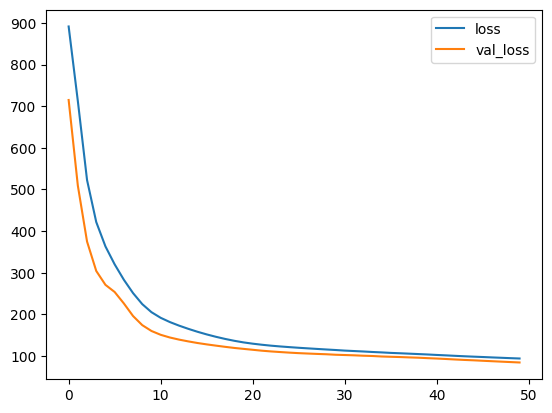

In [ ]:
# 코드 작성

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

# 문제3
문제1에서 학습한 모델을 테스트 셋(`X_test`, `y_test`)을 사용하여 평가 지표를 출력하고, 테스트 셋의 첫번째 값(`X_test[0]`)의 예측값을 구하시오.

In [ ]:
# 코드 작성

# 모델 평가
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.3353 - mse: 77.3353


[80.44316101074219, 80.44316101074219]

In [ ]:
# 값 예측
model.predict(X_test)[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([44.085835], dtype=float32)